Analysis Script: Dimension Reduction
Developed by Konstantin Tskhay

------------------------------------------

# Dimension Reduction
## Principal Component Analysis & Exploratory Factor Analysis

### Steps:

1. Import the data
2. Load necessary packages
3. Extract necessary data for PCA
4. Set up all of the preconditions
5. Run PCA/Visualizations
6. Interpret the output
7. Set up for EFA
8. Run EFA/Visualizations
9. Interpret the output
10. Parallel Analysis (Horn, 1965)
11. Mini-validation

-----------------------------

### *Note*. I would like to encourage you type your code--this practice ensures better retention. :)

In [1]:
#Click in this cell and press Shift + Enter
install.packages("psych")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Step 1: Import the data

The data are in .csv format: 'new_prof_data.csv'

Here is a brief description of the variables:


1. **ID** = Observation ID
2. **Prof.Name** = The name of the professor. Here, Name1 to Name213 are used
3. **Present** = “Presents the material in an organized, well-planned manner.”
4. **Explain** = “Explains concepts clearly and with appropriate use of examples.”
5. **Communi** = “Communicates enthusiasm and interest in the course material.”
6. **Teach** = “All things considered, performs effectively as a university teacher.”
7. **Workload** = “Compared to other courses at the same level, the workload is…”
8. **Difficulty** = “Compared to other courses at the same level, the level of difficulty of the material is…”
9. **learn.Exp** = “The value of the overall learning experience is…”
10. **Retake** = “Considering your experience with this course, and disregarding your need for it to meet program or degree requirements, would you still have taken this course?”
11. **Inf.** = The aggregate influence score (Interpersonal Charisma Scale)
12. **Kind** = The aggregate kindness score (Interpersonal Charisma Scale)


**_Notes._**

**Q3-Q6 scale**: 1 = extremely poor; 2 = very poor; 3 = poor; 4 = adequate; 5 = good; 6 = very good; 7 = outstanding

**Q7-Q9 scale**: 1 = very low; 2 = low; 3 = below average; 4 = average; 5 = above average; 6 = high; 7 = very high

**Q10 scale**: proportion of people out of 100 who would still take the course considering the experience

**Q11-Q12 scale**: “I am someone who is…”; 1 = strongly disagree; 2 = moderately disagree; 3 = neither agree nor disagree; 4 = moderately agree; 5 = strongly agree



<br>

### Import data

In [2]:
## Read the data into an object named data
data <- read.csv('https://ibm.box.com/shared/static/t77i51hp8ighrg8mfh2q0gepwcwjfupo.csv') #new_prof_data.csv

## Examine data:
names(data)
str(data)
summary(data)
head(data)


[1] "ID"         "Prof.Name"  "Present"    "Explain"    "Communi"   
 [6] "Teach"      "Workload"   "Difficulty" "learn.Exp"  "Retake"    
[11] "Inf."       "Kind"

'data.frame':	213 obs. of  12 variables:
 $ ID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Prof.Name : Factor w/ 213 levels "Name1","Name10",..: 1 112 137 148 159 170 181 192 203 2 ...
 $ Present   : num  5.62 5.7 6.03 6.07 6.6 ...
 $ Explain   : num  6.28 5.65 6.47 6.35 6.45 ...
 $ Communi   : num  6.7 5.73 6.67 6.65 6.6 ...
 $ Teach     : num  6.33 5.52 6.47 6.43 6.55 ...
 $ Workload  : num  4.5 4.18 4.4 4.42 4.9 ...
 $ Difficulty: num  4.3 4.12 4.63 4.52 4.5 ...
 $ learn.Exp : num  5.83 4.55 6 5.92 6.05 ...
 $ Retake    : num  87.7 57.2 88.3 87 87.5 ...
 $ Inf.      : num  3.67 3.67 5 2.67 3.67 ...
 $ Kind      : num  4.67 4.67 4.33 4 4 ...


       ID        Prof.Name      Present         Explain         Communi     
 Min.   :  1   Name1  :  1   Min.   :3.925   Min.   :4.100   Min.   :4.800  
 1st Qu.: 54   Name10 :  1   1st Qu.:5.350   1st Qu.:5.600   1st Qu.:5.950  
 Median :107   Name100:  1   Median :5.800   Median :5.900   Median :6.300  
 Mean   :107   Name101:  1   Mean   :5.711   Mean   :5.877   Mean   :6.211  
 3rd Qu.:160   Name102:  1   3rd Qu.:6.100   3rd Qu.:6.300   3rd Qu.:6.550  
 Max.   :213   Name103:  1   Max.   :6.800   Max.   :6.800   Max.   :6.950  
               (Other):207                                                  
     Teach          Workload       Difficulty      learn.Exp    
 Min.   :4.100   Min.   :3.467   Min.   :3.600   Min.   :4.000  
 1st Qu.:5.700   1st Qu.:4.200   1st Qu.:4.300   1st Qu.:5.000  
 Median :6.100   Median :4.500   Median :4.567   Median :5.350  
 Mean   :6.015   Mean   :4.572   Mean   :4.625   Mean   :5.367  
 3rd Qu.:6.400   3rd Qu.:4.900   3rd Qu.:4.900   3rd Qu.:5.

ID,Prof.Name,Present,Explain,Communi,Teach,Workload,Difficulty,learn.Exp,Retake,Inf.,Kind
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Name1,5.616667,6.283333,6.700000,6.333333,4.500000,4.300000,5.833333,87.66667,3.666667,4.666667
2,Name2,5.700000,5.650000,5.733333,5.516667,4.183333,4.116667,4.550000,57.16667,3.666667,4.666667
3,Name3,6.033333,6.466667,6.666667,6.466667,4.400000,4.633333,6.000000,88.33333,5.000000,4.333333
4,Name4,6.066667,6.350000,6.650000,6.433333,4.416667,4.516667,5.916667,87.00000,2.666667,4.000000
5,Name5,6.600000,6.450000,6.600000,6.550000,4.900000,4.500000,6.050000,87.50000,3.666667,4.000000
6,Name6,5.950000,6.100000,6.350000,5.900000,5.100000,4.300000,5.850000,88.50000,2.000000,5.000000


## Step 2: Load necessary packages

This will allow you to use functions needed for factor analysis and principal component analysis

if you don't have these packages on your machine use the following line:

    install.packages('package_name')
    
Where, *package_name* is the name of the package you are interested in

In [3]:
library(psych) ## for PCA and EFA 
library(ggplot2) ## for some Visuals


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



## Step 3: Extract necessary data for PCA

This step is simple: select relevant columns.
We want columns 3 through 8.

In [4]:
names(data) ## look up index
comp.data <- data[,3:8] ## extract data
names(comp.data) ## check

[1] "ID"         "Prof.Name"  "Present"    "Explain"    "Communi"   
 [6] "Teach"      "Workload"   "Difficulty" "learn.Exp"  "Retake"    
[11] "Inf."       "Kind"

[1] "Present"    "Explain"    "Communi"    "Teach"      "Workload"  
[6] "Difficulty"

## Step 4: Set up all of the preconditions

**Question**: Can we reduce the number of variables?
**Answer**: Yes. Let's do it.

  

To do so, we need to see interrelationships between the variables.
From before, we know that there may be 2 types of variables emerging.

1. The variables that specify how good the professors are at communication
2. The variables that track the course difficulty

Let us examine whether this may be the case

In [5]:
round(cor(comp.data), digits = 3) ## produces correlation matrix

,Present,Explain,Communi,Teach,Workload,Difficulty
Present,1.000,0.855,0.603,0.800,0.151,0.043
Explain,0.855,1.000,0.756,0.891,0.056,-0.026
Communi,0.603,0.756,1.000,0.819,0.128,0.060
Teach,0.800,0.891,0.819,1.000,0.138,0.081
Workload,0.151,0.056,0.128,0.138,1.000,0.719
Difficulty,0.043,-0.026,0.060,0.081,0.719,1.000


You can see immediately that all communication variables are highly correlated. The difficulty variable correlates quite highly with the workload variable. However, there appears to be little overlap between communication and workload/difficulty variables.

**This suggests that there are probably 2 components/factors in our data.**

However, this example is simple because here we see a separation of the variables in the correlation matrix and know that the variables will probably split *a priori*. The data we work with in the real world are more complex, however.

    e.g., 20, 100, 1000, 10000 variables
    
Now, imagine trying to identify how these variables form components or factors using correlation matrix or some type of hypothesis driven reasoning! It is practically impossible!

----------------------------
### Decision Rules:
1. Probably 2 components (Communication, Workload)
2. The components are probably orthogonal
3. Check it empirically

## Step 5 & 6: Run PCA/Visualizations & Interpret the output

In [6]:
pcaSolution <- prcomp(comp.data, center = TRUE, scale. = TRUE) 

## Produced the object with standard deviatons of all variables
## and Rotation -- or the loadings on the principal components

print(pcaSolution) ## prints PCA solution

print(pcaSolution$sdev^2) ## converting to variance

Standard deviations (1, .., p=6):
[1] 1.8443717 1.3029063 0.6424267 0.5268562 0.3459505 0.3012588

Rotation (n x k) = (6 x 6):
                 PC1         PC2         PC3         PC4         PC5
Present    0.4812739  0.04614410 -0.63443650 -0.03777691  0.55990582
Explain    0.5127898  0.12651133 -0.16342075 -0.06968290 -0.34260959
Communi    0.4670223  0.04023162  0.73502722  0.15324099  0.46160796
Teach      0.5188259  0.04304370  0.10233296 -0.10077104 -0.58073509
Workload   0.1167782 -0.69214922 -0.11178861  0.69377824 -0.11331686
Difficulty 0.0670437 -0.70662842  0.08689213 -0.69191860  0.07712509
                   PC6
Present    -0.22094091
Explain     0.75637171
Communi     0.05866729
Teach      -0.60916901
Workload    0.02503335
Difficulty  0.06270205
[1] 3.40170692 1.69756491 0.41271211 0.27757748 0.11968174 0.09075685


### Let's create the Scree plot: Variance explained versus components

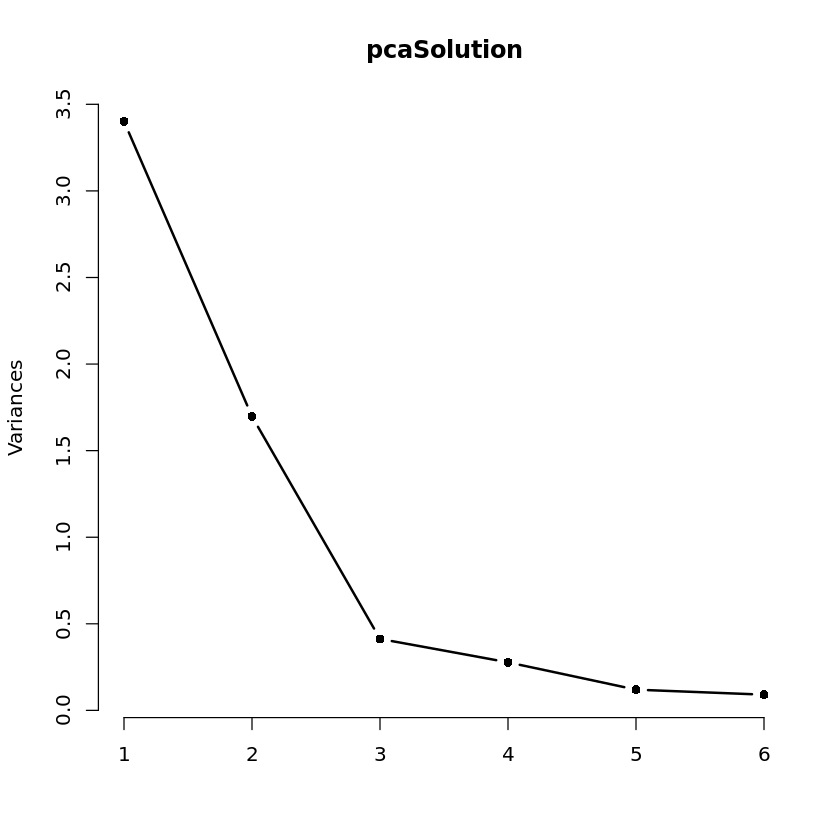

In [7]:
plot(pcaSolution, type = "l", pch = 16, lwd = 2) ## generates a scree plot

This figure will help us to decide how many components we should extract.
The first two PC explain most of the variability in the data--so, probably 2 components to extract.

Let's see how important each component is in a different way: Take a look of proportion of variance explained (second line in the output table below)

In [8]:
summary(pcaSolution)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6
Standard deviation     1.8444 1.3029 0.64243 0.52686 0.34595 0.30126
Proportion of Variance 0.5669 0.2829 0.06879 0.04626 0.01995 0.01513
Cumulative Proportion  0.5669 0.8499 0.91866 0.96493 0.98487 1.00000

In [9]:
0.5669 + 0.2829 ## proportion of matrix variance explained by the 
                ## first 2 components

[1] 0.8498

### What items fall on each component?

Well, we can take a look at that examining, pcaSolution's matrix:

In [10]:
pcaSolution$rotation[,1:2] ## only looks at the first 2 components

,PC1,PC2
Present,0.4812739,0.04614410
Explain,0.5127898,0.12651133
Communi,0.4670223,0.04023162
Teach,0.5188259,0.04304370
Workload,0.1167782,-0.69214922
Difficulty,0.0670437,-0.70662842


**Everything is pretty much as expected!**

**Let's create a visual of the components now:**

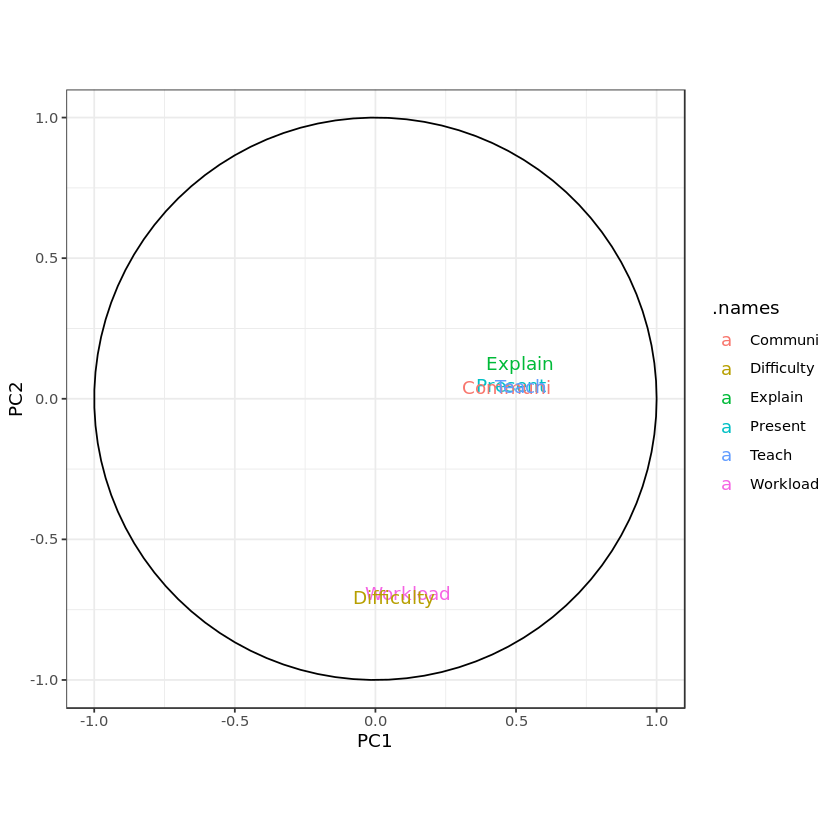

In [11]:
theta <- seq(0,2*pi,length.out = 100)
circle <- data.frame(x = cos(theta), y = sin(theta))
p <- ggplot(circle, aes(x,y)) + geom_path()

loadings <- data.frame(pcaSolution$rotation, .names = row.names(pcaSolution$rotation))
p + geom_text(data=loadings, 
              mapping=aes(x = PC1, y = PC2, label = .names, colour = .names)) +
        coord_fixed(ratio=1) +
        labs(x = "PC1", y = "PC2") +
        theme_bw()

This last step is not necessary, however it is a decent visualization. Basically shows that the 2 factors are orthogonal and that the communication variables tend to map onto the first component and that the difficulty variables tend to map on the second component. Naturally, when you have more variables, the circle will be more complex and less conducive to presentation or interpretation. 

## Step 7: Set up for EFA

Once again, you want to first extract the relevant data. Typically people will do either PCA or EFA, depending on their research question, which informs the selection of the technique. Factor analysis is used when you think that something bigger than the variables at hand causes those variables and interrelationships between those variables. In other words, you assume that your indicators, measured variables, are not measured perfectly. EFA is very common in survey research, including customer satistaction surveys and personality measurement. 

    e.g., suppose your respondents answer some questions about how "outgoing" they are and how "sociable" they are. We assume further that an underlying personality of Extraversion causes people to choose greater number if they are extraverted and lower numbers if they are introveted! That is, people who are extraverted are expected to say that they are more "outgoing" and "sociable" than people who are introverted. We say here, then that extraversion construct (factor) causes systematic variance in reponses to items, but also that the measures are not perfect indicators of extraversion. So what is important here, is the shared variance between the items. 
    
### Factor analysis allows us to identify this latent construct

Okay, now we will:

**1. Extract the relevant data**



In [12]:
## note that I am using exactly the same code as in PCA, 
## except that I am naming the object differently

names(data) ## look up index
factor.data <- data[,3:8] ## extract data
names(factor.data) ## check

[1] "ID"         "Prof.Name"  "Present"    "Explain"    "Communi"   
 [6] "Teach"      "Workload"   "Difficulty" "learn.Exp"  "Retake"    
[11] "Inf."       "Kind"

[1] "Present"    "Explain"    "Communi"    "Teach"      "Workload"  
[6] "Difficulty"

**2. Decide on the number of factors to extract**

In [13]:
eigen.values <- eigen(cor(factor.data)) ## extract eigenvalues from cor()
eigen.values ## note that eigenvalues are simply squared st.devs from before! 

eigen() decomposition
$values
[1] 3.40170692 1.69756491 0.41271211 0.27757748 0.11968174 0.09075685

$vectors
           [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,] -0.4812739 -0.04614410  0.63443650  0.03777691  0.55990582 -0.22094091
[2,] -0.5127898 -0.12651133  0.16342075  0.06968290 -0.34260959  0.75637171
[3,] -0.4670223 -0.04023162 -0.73502722 -0.15324099  0.46160796  0.05866729
[4,] -0.5188259 -0.04304370 -0.10233296  0.10077104 -0.58073509 -0.60916901
[5,] -0.1167782  0.69214922  0.11178861 -0.69377824 -0.11331686  0.02503335
[6,] -0.0670437  0.70662842 -0.08689213  0.69191860  0.07712509  0.06270205


Create a new scree plot

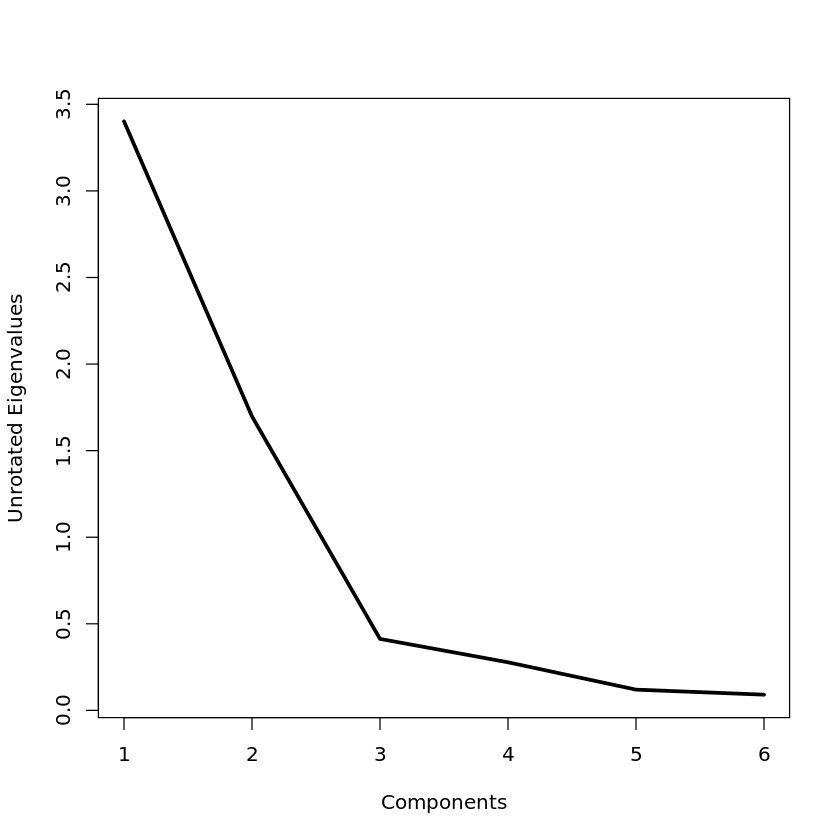

In [14]:
plot(eigen.values$values, type="l", ylab = 'Unrotated Eigenvalues',
    xlab = 'Components', lwd = 3)

Once again, we see that 2 factors explain most of the variance. 

Further, you also need to select the factors based on the eigen values themselves they should be greater than 1. Again, the solution is 2. 

In [15]:
eigen.values$values/(sum(eigen.values$values)) ## compute proportion of 
                                               ##total variance

## How much variance due to the first 2 factors?
sum((eigen.values$values/(sum(eigen.values$values)))[c(1, 2)])

[1] 0.56695115 0.28292749 0.06878535 0.04626291 0.01994696 0.01512614

[1] 0.8498786

Okay, we meet the three major standards (see parallel analysis later for an alternative result). 

**3. What kind of rotation to use?**

Here, we do not truly need to be exactly data driven. All previous work has demonstrated that orthogonal rotation would be preferable. 

Use: **Varimax** to increase the distance between factors. 

** 4. What would you want as a factoring method?**

Here, we will use principal axis factoring [most commonly used method in psychology research]. 

This says to place factor communalities in the diagonal, which would estimate the residual variation, stating that the factors do not explain all of the variance. In PCA, the 1s are retained across the diagonal. 

### Let's Recap the Pre-processing steps & Decisions:

1. Data extracted
2. Number of factors k = 2
3. Rotation: Orthogonal rotation
4. Factoring method: Principal Axis Factoring (PA)

Let's do it!

## Step 8 & 9: Run EFA/Visualizations & Interpret the output

**Get the correlation matrix**

In [16]:
corMat <- round(cor(factor.data), digits = 3)
corMat

,Present,Explain,Communi,Teach,Workload,Difficulty
Present,1.000,0.855,0.603,0.800,0.151,0.043
Explain,0.855,1.000,0.756,0.891,0.056,-0.026
Communi,0.603,0.756,1.000,0.819,0.128,0.060
Teach,0.800,0.891,0.819,1.000,0.138,0.081
Workload,0.151,0.056,0.128,0.138,1.000,0.719
Difficulty,0.043,-0.026,0.060,0.081,0.719,1.000


**Run exploratory factor analysis**

In [17]:
efaSolution <- fa(r = corMat, nfactors = 2, rotate = "varimax", fm = 'pa')
print(efaSolution)

Factor Analysis using method =  pa
Call: fa(r = corMat, nfactors = 2, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
            PA1   PA2   h2    u2 com
Present    0.83  0.06 0.70 0.303   1
Explain    0.97 -0.04 0.94 0.059   1
Communi    0.79  0.06 0.63 0.374   1
Teach      0.96  0.07 0.93 0.069   1
Workload   0.10  0.85 0.73 0.273   1
Difficulty 0.01  0.85 0.72 0.283   1

                       PA1  PA2
SS loadings           3.19 1.45
Proportion Var        0.53 0.24
Cumulative Var        0.53 0.77
Proportion Explained  0.69 0.31
Cumulative Proportion 0.69 1.00

Mean item complexity =  1
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  4.94
The degrees of freedom for the model are 4  and the objective function was  0.39 

The root mean square of the residuals (RMSR) is  0.03 
The df corrected root mean square of the residuals is  0.05 

Fit base

In [18]:
pchisq(.39, 4, ncp = 0, lower.tail = FALSE, log.p = FALSE)

[1] 0.9832874

The model fit appears to be sufficient. Both factor eigen values are above 1. The loadings on each factor are quite high (>.70 threshold) and the proportion of variance explained == 77%. This is a pretty decent solution. 

Let's do a quick graph for it! 

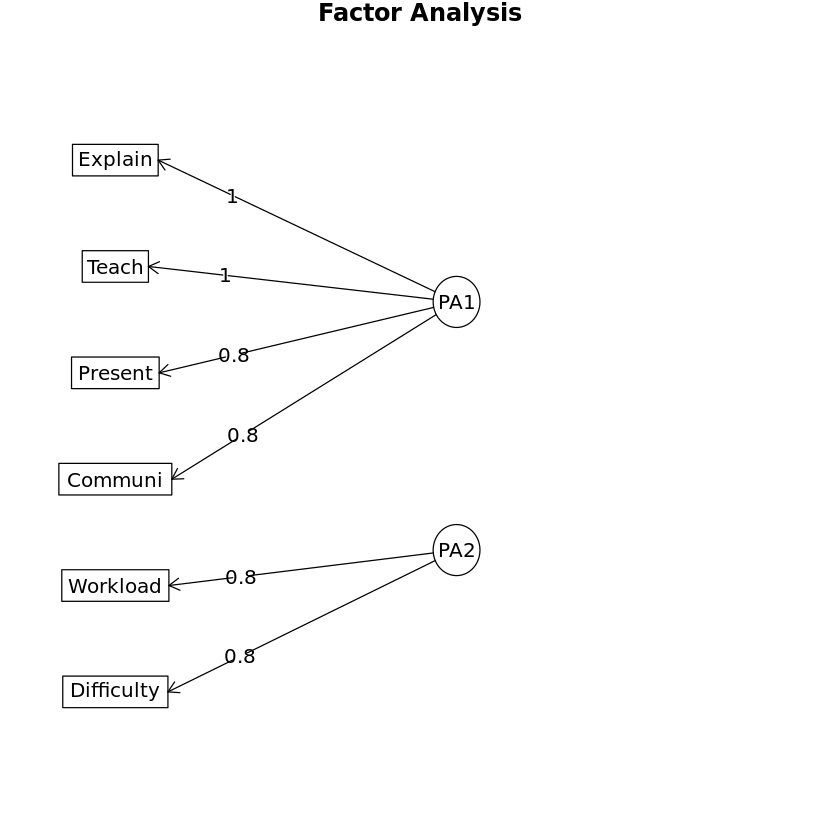

In [19]:
fa.diagram(efaSolution)

This is not the best graph and it should not be presented in publication, but it is a good representation of what we did.

Factor 1 causes variables Explain, Teach, Present, and Communi

Factor 2 causes variables Workload, Difficulty

Name your factors. 

## Step 10: Parallel Analysis

This analysis is said to be the most robust analysis for identifying the number of factors. However, it is rarely used. It is rather simple:

1. You will create multiple random datasets with same *n* observations and *k* factors
2. Compute a correlation matrix for each dataset and extract eigenvalues
3. If random eigenvalues are larger than those in the PCA or EFA, you know that the values are likely to be simply noise. 
4. So, you want your eigen values to be larger than those simulated randomly.

Typically 100 simulations is recommended, but more is better. You don't want to overload your machine with computations, however. Here is how to do it.

Parallel analysis suggests that the number of factors =  2  and the number of components =  2 


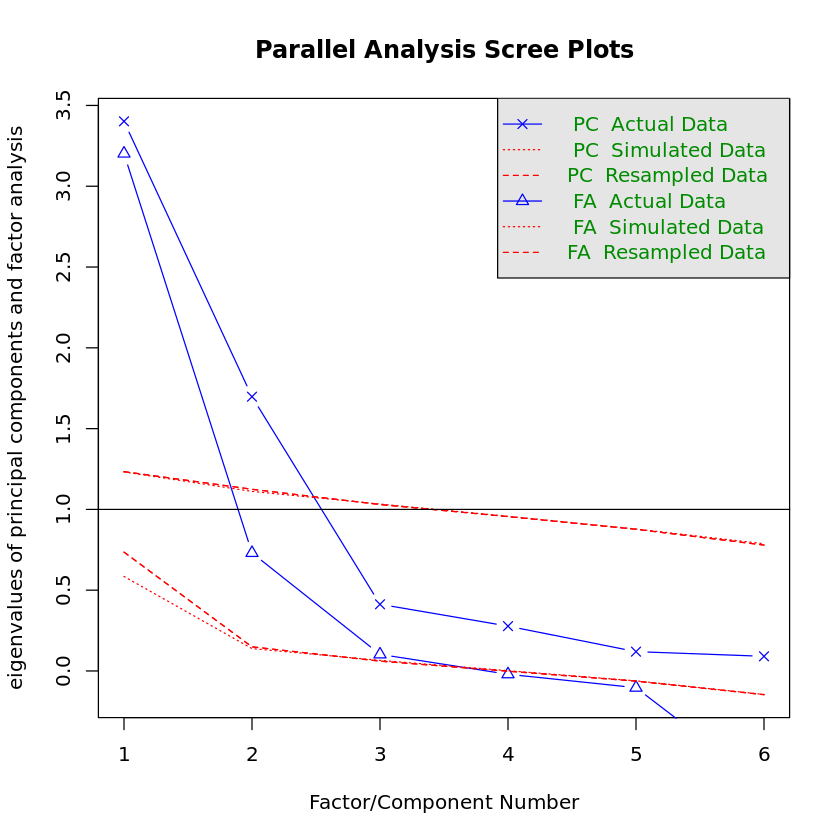

In [20]:
fa.parallel(factor.data, n.iter = 100)

A new scree is produced. The red lines represent simulated and resampled data. Blue lines are the actual data. 

As you can see, the line with x-points shows that 2 components should be extracted. -- this line is compared to the top red line and only 2 points exceed the red line--hence, 2 PCs to extract

When it comes to FA, there appears a need for a third component--yet, I am skeptical. The third triangle on the blue line pretty much overlaps with the red line. The distances are much larger in the other cases. 

** Okay, let's run some FA with 3 factors **

In [21]:
efaSolution2 <- fa(r = corMat, nfactors = 3, rotate = "varimax", fm = 'pa')
efaSolution2

Factor Analysis using method =  pa
Call: fa(r = corMat, nfactors = 3, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
            PA1   PA2   PA3   h2    u2 com
Present    0.64  0.06  0.70 0.90 0.098 2.0
Explain    0.83 -0.04  0.47 0.91 0.091 1.6
Communi    0.88  0.06  0.05 0.79 0.211 1.0
Teach      0.90  0.08  0.31 0.92 0.083 1.2
Workload   0.07  0.85  0.07 0.74 0.263 1.0
Difficulty 0.02  0.84 -0.02 0.71 0.288 1.0

                       PA1  PA2  PA3
SS loadings           2.70 1.45 0.81
Proportion Var        0.45 0.24 0.13
Cumulative Var        0.45 0.69 0.83
Proportion Explained  0.54 0.29 0.16
Cumulative Proportion 0.54 0.84 1.00

Mean item complexity =  1.3
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  4.94
The degrees of freedom for the model are 0  and the objective function was  0.01 

The root mean square of the residuals (RMSR) is  0.

**Output:**

Examinig this output we notice high cross loadings of item Present between PA1 and PA3. Next, the PA3's SS loadings are .81, which does not exceed our threshold = 1. 

Finally, there is little information about the model fit, because it is a saturated model. 

In sum, I typically would not advise for retaining the last factor in the current model. 

## Step 11: Mini-Validation

Here, you want to basically generate factor or component scores with your variables and start building models. I will simply aggregate the variables defined by each component/factor. Then perform linear regression (lm) to see how well my components might predict other variables. 

Create means for Component/factor 1: course communication -- CC
Create means for Component/factor 2: course difficulty -- CD

add them to dataset

In [22]:
data$CC <- rowMeans(data[, 3:6])
data$CD <- rowMeans(data[, 7:8])

1. Fit the model examining students' learning experience from communication and difficulty
2. Fit the model examining students' retake rate (knowing the course and the professor, would they want to take it again)

In [23]:
fit1 <- lm(learn.Exp ~ CC + CD, data = data); summary(fit1)
fit2 <- lm(Retake ~ CC + CD, data = data); summary(fit2)


Call:
lm(formula = learn.Exp ~ CC + CD, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86917 -0.19247 -0.01364  0.21511  1.05251 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.83082    0.32994  -2.518   0.0125 *  
CC           0.86724    0.04664  18.595  < 2e-16 ***
CD           0.22501    0.04465   5.039 1.01e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3126 on 210 degrees of freedom
Multiple R-squared:  0.6515,	Adjusted R-squared:  0.6482 
F-statistic: 196.3 on 2 and 210 DF,  p-value: < 2.2e-16



Call:
lm(formula = Retake ~ CC + CD, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.973  -5.694   1.066   5.979  23.479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.640     11.633  -0.829    0.408    
CC            20.329      1.644  12.362  < 2e-16 ***
CD            -6.926      1.574  -4.399 1.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.02 on 210 degrees of freedom
Multiple R-squared:  0.4374,	Adjusted R-squared:  0.4321 
F-statistic: 81.64 on 2 and 210 DF,  p-value: < 2.2e-16


**Output:**

Both are predictors and explain quite a bit of variance;

However, though all students appear to like professors who are better at communication...

They tend to think taht difficulty produced better learning experience, yet would not take the course again. 

Naturally, in more complicated datasets, you can run more complex models. 

<h1, align="center"> FIN </h1>


## RESOURCES:


### Useful Links:

- **Data Science** http://bigdatauniversity.com
- **Clustering** http://bigdatauniversity.com/bdu-wp/bdu-course/machine-learning-cluster-analysis/
- **PCA & CFA** http://bit.ly/1OozM3N

- **R-Code** http://www.statmethods.net/advstats/factor.html
- **Visualize** http://www.r-bloggers.com/computing-and-visualizing-pca-in-r/

### Books:

- **Factor Analysis** http://www.amazon.ca/Factor-Analysis-Richard-L-Gorsuch/dp/1138831999/ref=sr_1_2?ie=UTF8&qid=1444011728&sr=8-2&keywords=factor+analysis
- **Principal Component Analysis** http://www.amazon.ca/Principal-Components-Analysis-George-Dunteman/dp/0803931042/ref=sr_1_2?ie=UTF8&qid=1444011812&sr=8-2&keywords=principal+component+analysis

### Uses in Measurement:

- http://scholarship.sha.cornell.edu/cgi/viewcontent.cgi?article=1618&context=articles
- http://personal.stevens.edu/~ysakamot/719/week4/scaledevelopment.pdf
- http://scholarship.sha.cornell.edu/cgi/viewcontent.cgi?article=1515&context=articles